In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

# EDA STARTS FROM HERE .. ENJOY 

In [10]:
pd.set_option('max_columns', None)
df_train = pd.read_csv('Video_games_esrb_rating.csv')
df_test = pd.read_csv('test_esrb.csv')

In [3]:
df_train

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,intense_violence,language,lyrics,mature_humor,mild_blood,mild_cartoon_violence,mild_fantasy_violence,mild_language,mild_lyrics,mild_suggestive_themes,mild_violence,no_descriptors,nudity,partial_nudity,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,Monster Jam Steel Titans 2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,E
1,Subnautica: Below Zero,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,ET
2,NIER REPLICANT VER.1.22474487139…,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,M
3,Jamestown+,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ET
4,Neptunia Virtual Stars,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1890,SENRAN KAGURA Peach Beach Splash,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,M
1891,Sneaky Bears,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,T
1892,SPARC,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,E
1893,Still Time,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,T


as you can see my columns are in 0,1 (Dummy Variables) .. and I will explain the meaning of each columns by their importance regarding to my target variable. Note that the dataset is already been structured by (Dummy Variables) from it's source. 



Explaining my Dataset: 

 
For all columns Except [title, console,esrb_rating]: 0 means this feature is not in the game, and 1 means this feature is in the game.


For column Console : it means like that: 0 = PS4, 1 = PS4 & Xbox_one. So, we understand what columns in this data.



In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1895 entries, 0 to 1894
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   title                     1895 non-null   object
 1   console                   1895 non-null   int64 
 2   alcohol_reference         1895 non-null   int64 
 3   animated_blood            1895 non-null   int64 
 4   blood                     1895 non-null   int64 
 5   blood_and_gore            1895 non-null   int64 
 6   cartoon_violence          1895 non-null   int64 
 7   crude_humor               1895 non-null   int64 
 8   drug_reference            1895 non-null   int64 
 9   fantasy_violence          1895 non-null   int64 
 10  intense_violence          1895 non-null   int64 
 11  language                  1895 non-null   int64 
 12  lyrics                    1895 non-null   int64 
 13  mature_humor              1895 non-null   int64 
 14  mild_blood              

In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   title                     500 non-null    object
 1   console                   500 non-null    int64 
 2   alcohol_reference         500 non-null    int64 
 3   animated_blood            500 non-null    int64 
 4   blood                     500 non-null    int64 
 5   blood_and_gore            500 non-null    int64 
 6   cartoon_violence          500 non-null    int64 
 7   crude_humor               500 non-null    int64 
 8   drug_reference            500 non-null    int64 
 9   fantasy_violence          500 non-null    int64 
 10  intense_violence          500 non-null    int64 
 11  language                  500 non-null    int64 
 12  lyrics                    500 non-null    int64 
 13  mature_humor              500 non-null    int64 
 14  mild_blood                

No null values and all my Dtypes are int64 except [title ,esrb_rating] are objects .

In [6]:
PS4 = df_train[df_train["console"] == 0]
PS4_and_XboxOne = df_train[df_train["console"] == 1]

In [9]:
df.corr()

NameError: name 'df' is not defined

first I have sapreated my consols for visualization purposes to show the number of PS4 exclusive games. 

In [6]:
#pd.set_option('max_rows', None)
PS4

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,intense_violence,language,lyrics,mature_humor,mild_blood,mild_cartoon_violence,mild_fantasy_violence,mild_language,mild_lyrics,mild_suggestive_themes,mild_violence,no_descriptors,nudity,partial_nudity,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
3,Jamestown+,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ET
4,Neptunia Virtual Stars,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,T
6,Monochrome Order,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,T
8,Maquette,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ET
9,FATAL FURY™ BATTLE ARCHIVES VOL.2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1889,Obduction,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,ET
1890,SENRAN KAGURA Peach Beach Splash,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,M
1891,Sneaky Bears,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,T
1892,SPARC,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,E


In [7]:
PS4_and_XboxOne

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,intense_violence,language,lyrics,mature_humor,mild_blood,mild_cartoon_violence,mild_fantasy_violence,mild_language,mild_lyrics,mild_suggestive_themes,mild_violence,no_descriptors,nudity,partial_nudity,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,Monster Jam Steel Titans 2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,E
1,Subnautica: Below Zero,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,ET
2,NIER REPLICANT VER.1.22474487139…,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,M
5,Monster Energy Supercross - The Official Video...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,E
7,Blightbound,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1884,Feral Fury,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,T
1885,Pillars of Eternity,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,M
1886,X-Morph: Defense,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,T
1887,Absolver,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,T


Text(0.5, 1.0, 'GAMES ON EACH CONSOLE')

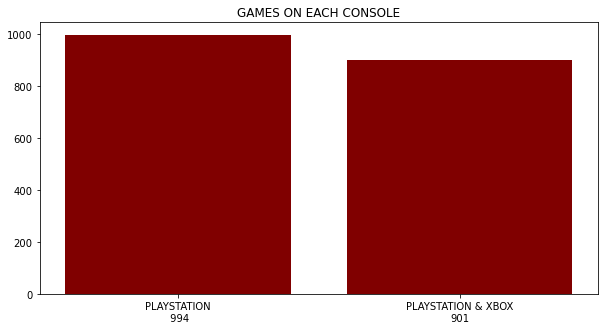

In [8]:

PS4_GA = len(PS4)
PS4_XBOXONE_GA = len(PS4_and_XboxOne)

Lable_GAMES_NAMES = [PS4_GA,PS4_XBOXONE_GA]
Lable_NAMES= [f"PLAYSTATION\n {PS4_GA}",f"PLAYSTATION & XBOX\n{PS4_XBOXONE_GA}"]

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(Lable_NAMES,Lable_GAMES_NAMES, color ='maroon')
plt.title("GAMES ON EACH CONSOLE")

In [9]:
df_train.esrb_rating.value_counts()

T     689
E     416
ET    403
M     387
Name: esrb_rating, dtype: int64

Text(0.5, 1.0, 'Blood in the game or not')

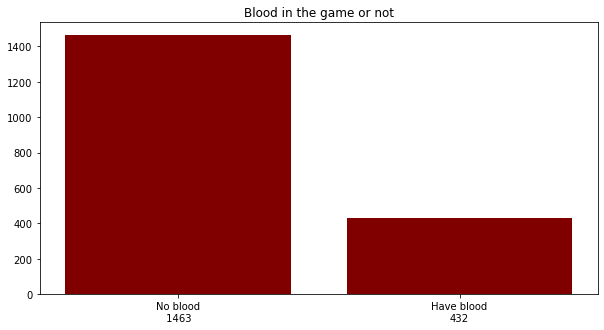

In [10]:
N_blood = df_train[df_train["blood"] == 0]
Y_blood = df_train[df_train["blood"] == 1]


N_blood_GA = len(N_blood)
Y_blood_GA = len(Y_blood)

Lable_BLOOD_GA = [N_blood_GA,Y_blood_GA]
Lable_BLOOD = [f"No blood\n {N_blood_GA}",f"Have blood\n{Y_blood_GA}"]

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(Lable_BLOOD,Lable_BLOOD_GA, color ='maroon')
plt.title("Blood in the game or not")


In [11]:
featuers = df_train.loc[:,'alcohol_reference':'violence']
target = df_train['esrb_rating']

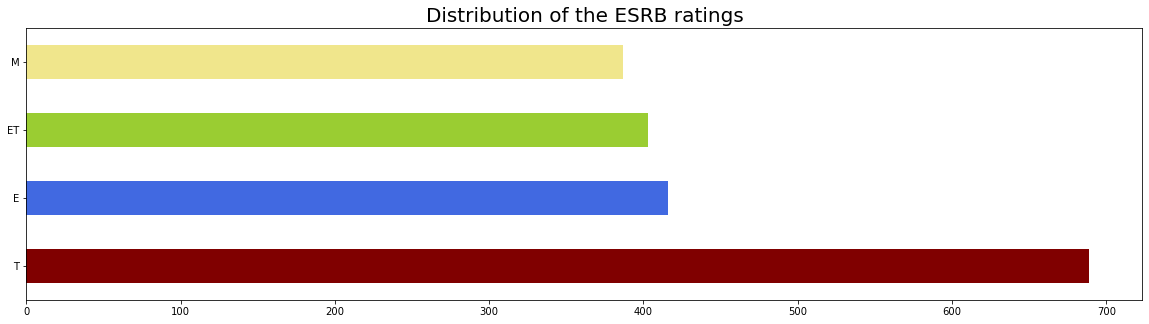

In [12]:
target.value_counts().plot.barh(color = ['maroon','royalblue','yellowgreen','khaki'],figsize = (20,5));
plt.title('Distribution of the ESRB ratings', fontsize = 20);


In [11]:
#Can we find somthing here ?! -- I think it will help but i need more justification. 
#I will leave it for now and come back to it ;)

#sns.pairplot(pd.concat([X_train, y_train], axis=1), hue='esrb_rating');

NameError: name 'X_train' is not defined

# Not Scaled 

In [14]:
#split the data .. 

#train 
X_train = df_train.loc[:,'alcohol_reference':'violence']
y_train = df_train['esrb_rating']

#test 
X_test = df_test.loc[:,'alcohol_reference':'violence']
y_test = df_test['esrb_rating']


In [15]:
models = {
   
    "KNeighborsClassifier":{"model":KNeighborsClassifier() },
    "LogisticRegression":{"model":LogisticRegression(random_state=42) },
    "DecisionTreeClassifier":{"model":DecisionTreeClassifier(random_state=42) },
    "RandomForestClassifier":{"model":RandomForestClassifier(random_state=42) },
    "GradientBoostingClassifier":{"model":GradientBoostingClassifier(random_state=42) },
}

for model_name, m in models.items():
    m['model'].fit(X_train, y_train)
    y_pred = m['model'].predict(X_test)
    train_acc = m['model'].score(X_train,y_train)
    test_acc = m['model'].score(X_test,y_test)
    m['train_acc'] = train_acc
    m['test_acc'] = test_acc
    print(f"{model_name} - train acc: {train_acc*100:.2f}%  -- test acc: {test_acc*100:.2f}%") 

KNeighborsClassifier - train acc: 87.70%  -- test acc: 83.00%
LogisticRegression - train acc: 85.80%  -- test acc: 80.00%
DecisionTreeClassifier - train acc: 91.77%  -- test acc: 82.60%
RandomForestClassifier - train acc: 91.77%  -- test acc: 85.00%
GradientBoostingClassifier - train acc: 88.34%  -- test acc: 79.40%


In [16]:
models_result = []

for model_name ,m1 in models.items():
    lst = [model_name,m1['train_acc'], m1['test_acc']]
    models_result.append(lst)

df_results = pd.DataFrame(models_result, columns = ['model','train_acc','test_acc'])
df_results.sort_values(by='test_acc', ascending=False, inplace=True)
df_results.reset_index(inplace=True,drop=True)
df_results

,model,train_acc,test_acc
0,RandomForestClassifier,0.917678,0.850
1,KNeighborsClassifier,0.877045,0.830
2,DecisionTreeClassifier,0.917678,0.826
3,LogisticRegression,0.858047,0.800
4,GradientBoostingClassifier,0.883377,0.794


Note that the train set and test set not scaled yet !

In [17]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Scaled .. lets see the difference :)

In [18]:
models = {
   
    "KNeighborsClassifier":{"model":KNeighborsClassifier() },
    "LogisticRegression":{"model":LogisticRegression(random_state=42) },
    "DecisionTreeClassifier":{"model":DecisionTreeClassifier(random_state=42) },
    "RandomForestClassifier":{"model":RandomForestClassifier(random_state=42) },
    "GradientBoostingClassifier":{"model":GradientBoostingClassifier(random_state=42) },
}

for model_name, m in models.items():
    m['model'].fit(X_train_scaled, y_train)
    y_pred = m['model'].predict(X_test_scaled)
    train_acc = m['model'].score(X_train_scaled,y_train)
    test_acc = m['model'].score(X_test_scaled,y_test)
    m['train_acc'] = train_acc
    m['test_acc'] = test_acc
    print(f"{model_name} - train acc: {train_acc*100:.2f}%  -- test acc: {test_acc*100:.2f}%") 

KNeighborsClassifier - train acc: 86.23%  -- test acc: 81.40%
LogisticRegression - train acc: 86.54%  -- test acc: 81.80%
DecisionTreeClassifier - train acc: 91.77%  -- test acc: 82.60%
RandomForestClassifier - train acc: 91.77%  -- test acc: 85.00%
GradientBoostingClassifier - train acc: 88.34%  -- test acc: 79.40%


In [19]:
models_result = []

for model_name ,m1 in models.items():
    lst = [model_name,m1['train_acc'], m1['test_acc']]
    models_result.append(lst)

df_results = pd.DataFrame(models_result, columns = ['model','train_acc','test_acc'])
df_results.sort_values(by='test_acc', ascending=False, inplace=True)
df_results.reset_index(inplace=True,drop=True)
df_results

,model,train_acc,test_acc
0,RandomForestClassifier,0.917678,0.850
1,DecisionTreeClassifier,0.917678,0.826
2,LogisticRegression,0.865435,0.818
3,KNeighborsClassifier,0.862269,0.814
4,GradientBoostingClassifier,0.883377,0.794


HERE ARE THE MODELS AFTER WE TRAINED THEM AND TESTED THEM

As We notice there is small change happend to the final results .. because all my featuers are dummies.

# Here I will show Classification reports for my models.

In [20]:
#Not_Scaled
model = RandomForestClassifier()
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Cr = classification_report(y_test, y_pred)
print(Cr)

print("Training Score: ", model.score(X_train, y_train))
print("Test Score: ", model.score(X_test, y_test))

              precision    recall  f1-score   support

           E       0.95      0.95      0.95       100
          ET       0.84      0.88      0.86       126
           M       0.90      0.67      0.76        90
           T       0.79      0.86      0.83       184

    accuracy                           0.85       500
   macro avg       0.87      0.84      0.85       500
weighted avg       0.85      0.85      0.85       500

Training Score:  0.9176781002638522
Test Score:  0.85


In [26]:
#Scaled
model = RandomForestClassifier()
model = model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

Cr = classification_report(y_test, y_pred)
print(Cr)

print("Training Score: ", model.score(X_train_scaled, y_train))
print("Test Score: ", model.score(X_test_scaled, y_test))

              precision    recall  f1-score   support

           E       0.95      0.95      0.95       100
          ET       0.84      0.91      0.87       126
           M       0.90      0.67      0.76        90
           T       0.81      0.86      0.83       184

    accuracy                           0.86       500
   macro avg       0.87      0.85      0.86       500
weighted avg       0.86      0.86      0.85       500

Training Score:  0.9176781002638522
Test Score:  0.856


In [21]:
#Not_Scaled
model = DecisionTreeClassifier()
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Cr = classification_report(y_test, y_pred)
print(Cr)

print("Training Score: ", model.score(X_train, y_train))
print("Test Score: ", model.score(X_test, y_test))




              precision    recall  f1-score   support

           E       0.94      0.95      0.95       100
          ET       0.77      0.90      0.83       126
           M       0.89      0.62      0.73        90
           T       0.78      0.81      0.80       184

    accuracy                           0.83       500
   macro avg       0.85      0.82      0.83       500
weighted avg       0.83      0.83      0.82       500

Training Score:  0.9176781002638522
Test Score:  0.826


In [27]:
#Scaled
model = DecisionTreeClassifier()
model = model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

Cr = classification_report(y_test, y_pred)
print(Cr)

print("Training Score: ", model.score(X_train_scaled, y_train))
print("Test Score: ", model.score(X_test_scaled, y_test))

              precision    recall  f1-score   support

           E       0.94      0.95      0.95       100
          ET       0.77      0.90      0.83       126
           M       0.89      0.62      0.73        90
           T       0.78      0.81      0.80       184

    accuracy                           0.83       500
   macro avg       0.85      0.82      0.83       500
weighted avg       0.83      0.83      0.82       500

Training Score:  0.9176781002638522
Test Score:  0.826


In [22]:
#Not_Scaled
model = LogisticRegression()
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Cr = classification_report(y_test, y_pred)
print(Cr)

print("Training Score: ", model.score(X_train, y_train))
print("Test Score: ", model.score(X_test, y_test))

              precision    recall  f1-score   support

           E       0.94      0.95      0.95       100
          ET       0.80      0.80      0.80       126
           M       0.88      0.58      0.70        90
           T       0.71      0.83      0.77       184

    accuracy                           0.80       500
   macro avg       0.83      0.79      0.80       500
weighted avg       0.81      0.80      0.80       500

Training Score:  0.8580474934036939
Test Score:  0.8


In [28]:
#Scaled
model = LogisticRegression()
model = model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

Cr = classification_report(y_test, y_pred)
print(Cr)

print("Training Score: ", model.score(X_train_scaled, y_train))
print("Test Score: ", model.score(X_test_scaled, y_test))

              precision    recall  f1-score   support

           E       0.96      0.95      0.95       100
          ET       0.80      0.84      0.82       126
           M       0.89      0.60      0.72        90
           T       0.74      0.84      0.79       184

    accuracy                           0.82       500
   macro avg       0.85      0.81      0.82       500
weighted avg       0.83      0.82      0.82       500

Training Score:  0.8654353562005277
Test Score:  0.818


In [23]:
#Not_Scaled
model = KNeighborsClassifier()
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Cr = classification_report(y_test, y_pred)
print(Cr)

print("Training Score: ", model.score(X_train, y_train))
print("Test Score: ", model.score(X_test, y_test))

              precision    recall  f1-score   support

           E       0.90      0.95      0.93       100
          ET       0.79      0.86      0.82       126
           M       0.92      0.68      0.78        90
           T       0.79      0.82      0.80       184

    accuracy                           0.83       500
   macro avg       0.85      0.83      0.83       500
weighted avg       0.84      0.83      0.83       500

Training Score:  0.8770448548812665
Test Score:  0.83


In [29]:
#Scaled
model = KNeighborsClassifier()
model = model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

Cr = classification_report(y_test, y_pred)
print(Cr)

print("Training Score: ", model.score(X_train_scaled, y_train))
print("Test Score: ", model.score(X_test_scaled, y_test))

              precision    recall  f1-score   support

           E       0.88      0.98      0.92       100
          ET       0.89      0.75      0.81       126
           M       0.84      0.64      0.73        90
           T       0.74      0.85      0.79       184

    accuracy                           0.81       500
   macro avg       0.83      0.81      0.81       500
weighted avg       0.82      0.81      0.81       500

Training Score:  0.8622691292875989
Test Score:  0.814


In [25]:
#Not_Scaled
model = GradientBoostingClassifier()
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Cr = classification_report(y_test, y_pred)
print(Cr)

print("Training Score: ", model.score(X_train, y_train))
print("Test Score: ", model.score(X_test, y_test))

              precision    recall  f1-score   support

           E       0.93      0.84      0.88       100
          ET       0.83      0.84      0.83       126
           M       0.86      0.54      0.67        90
           T       0.70      0.86      0.77       184

    accuracy                           0.79       500
   macro avg       0.83      0.77      0.79       500
weighted avg       0.81      0.79      0.79       500

Training Score:  0.883377308707124
Test Score:  0.794


In [30]:
#Scaled
model = GradientBoostingClassifier()
model = model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

Cr = classification_report(y_test, y_pred)
print(Cr)

print("Training Score: ", model.score(X_train_scaled, y_train))
print("Test Score: ", model.score(X_test_scaled, y_test))

              precision    recall  f1-score   support

           E       0.93      0.84      0.88       100
          ET       0.83      0.84      0.83       126
           M       0.86      0.54      0.67        90
           T       0.70      0.86      0.77       184

    accuracy                           0.79       500
   macro avg       0.83      0.77      0.79       500
weighted avg       0.81      0.79      0.79       500

Training Score:  0.883377308707124
Test Score:  0.794
